Okt 2015
<img width=300 src="./fig/ladisk.png">

<center>[izr.prof. dr. Janko Slavič](http://www.ladisk.si/~slavic)</center>


<center>[Repozitorij pypinm](http://github.com/jankoslavic/pypinm)</center>

In [1]:
file = open('data/zapis_labview.lvm')
header = dict()
for line in file:
    a = line.split()
    if a[0] == '***End_of_Header***':
        break
    header[a[0]] = a[1]
file.close()

In [2]:
header

{'Date': '2013/02/19',
 'Decimal_Separator': ',',
 'LabVIEW': 'Measurement',
 'Multi_Headings': 'Yes',
 'Operator': 'JS',
 'Reader_Version': '2',
 'Separator': 'Tab',
 'Time': '09:51:39,1970510124996275989',
 'Time_Pref': 'Absolute',
 'Writer_Version': '2',
 'X_Columns': 'No'}

# Moduli (nadaljevanje)

Zadnjič smo spoznali nekatere osnovne module. Kako pogledamo katere module imamo nameščene?

In [ ]:
#help('modules') to poiščle res vse dostopne module

Ali pristop s pomočjo modula ``pip``:

In [3]:
import pip
instalirani = sorted(['{i.key}: {i.version}'.format(i=i) for i in pip.get_installed_distributions()])

In [4]:
instalirani[:3]

['alabaster: 0.7.3', 'argcomplete: 0.8.9', 'astropy: 1.0.3']

In [5]:
len(instalirani)

127

# Modul ``pip``

Modul [pip](https://pip.pypa.io/en/latest/index.html) se uporablja za avtomatsko namestitev modulov iz portala [pypi.python.org/pypi](https://pypi.python.org/pypi).

Modul poiščeno z ukazom:

In [6]:
kaj_sem_nasel = !pip search "youtube"  # Tukaj smo spoznali novi ukaz znotraj IPythona: 
                # dva klicaja !! izvedeta ukaz v ukazni vrstici in vrneta rezultat!
                # en klicaj ! samo izvede ukaz (in lahko vrne rezultat v spremenljivko)

In [7]:
kaj_sem_nasel[:3]

["Retrying (Retry(total=4, connect=None, read=None, redirect=None)) after connection broken by 'ProtocolError('Connection aborted.', gaierror(11001, 'getaddrinfo failed'))': /pypi",
 "Retrying (Retry(total=3, connect=None, read=None, redirect=None)) after connection broken by 'ProtocolError('Connection aborted.', gaierror(11001, 'getaddrinfo failed'))': /pypi",
 'Exception:']

In [8]:
len(kaj_sem_nasel)

21

In namestimo z ukazom:

In [9]:
!!pip install "youtube_dl" --upgrade

['Collecting youtube-dl',
 '  Downloading youtube_dl-2015.10.18-py2.py3-none-any.whl (1.1MB)',
 'Installing collected packages: youtube-dl',
 '  Found existing installation: youtube-dl 2015.10.16',
 '    Uninstalling youtube-dl-2015.10.16:',
 '      Successfully uninstalled youtube-dl-2015.10.16',
 'Successfully installed youtube-dl-2015.10.18']

Sedaj modul uporabimo (glejte tudi http://rg3.github.io/youtube-dl/):

In [10]:
import youtube_dl
yt = youtube_dl.YoutubeDL() # kreiramo objekt

Snamemo video (za različne opcije se glede help...)

In [ ]:
yt.download(url_list = ['EHVFolkBNwk'])

# Modul ``numpy``

Opomba: v okviru *Anaconda* distribucije Pythona so inštalirani praktično vsi pomembni moduli. V kolikor bi namestili Python *the hard way* bi sicer morali modul ``numpy`` namestiti posebej. Večji moduli imajo pogosto ločene namestitve, npr. za ``numpy`` glejte http://www.numpy.org. 

In [11]:
import numpy as np # uveljavljeno je, da se numpy importira v kratki ``np`` obliki

In [ ]:
?np

Gre za enega najbolj pomembnih modulov. Na kratko: gre za visoko optimiran modul za numerične izračune!

Poglejmo si, kako naredimo vektor ničel:

In [12]:
a = np.zeros(3)

In [13]:
a

array([ 0.,  0.,  0.])

Ali pa ``arange`` (poglejte argumente funkcije!):

In [14]:
b = np.arange(0, 9)
b

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [15]:
b = b.reshape((3, 3))

In [18]:
b[:, 0]

array([0, 3, 6])

Pogosto potrebujemo še seznam enic:

In [19]:
c = np.ones(4)
c

array([ 1.,  1.,  1.,  1.])

Do posameznega elementa dostopamo takole:

In [20]:
b[0] # Python začne indeksiranj z 0!

array([0, 1, 2])

Indeksiramo lahko tudi o zadaj:

In [21]:
b[-1]

array([6, 7, 8])

Poglejmo si sedaj **rezanje** (*slicing*) numeričnega polja.

Na dolgo: glejte [spletno dokumentacijo](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html).

Na kratko:

* ``b[start:end:korak]: elementi od start do end po korak-u``
* ``b[start:end]: elementi od start do end``
* ``b[start:]: elementi od start naprej``
* ``b[:end]: vsi do end elementov``
* ``b[:]: vsi elementi``

Opomba:

* **od** pomeni: večje ali enako <= 

* **do** pomeni: manjše <

Če želimo na primer prve tri elemente (torej elemente od 0 do 3: 0, 1, 2), to naredimo takole:

In [22]:
b[:3]

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Poglejmo nekatere primere

In [23]:
b[0:3:2] # beremo: od 0 do 3 vsak drugi element

array([[0, 1, 2],
       [6, 7, 8]])

In [24]:
b[::2] # beremo: od začetka do konca podaj vsak drugi element

array([[0, 1, 2],
       [6, 7, 8]])

In [25]:
b[1:-1] #beremo: od 1 do 1 element manj kot vsi

array([[3, 4, 5]])

In [26]:
b[-2:] # beremo: od 2 dva elementa manj kot vsi do konca

array([[3, 4, 5],
       [6, 7, 8]])

In [27]:
b[::-1] # beremo: od začetka do konca z negativnim korakom (to je lahko samo od konca proti začetku)

array([[6, 7, 8],
       [3, 4, 5],
       [0, 1, 2]])

Opomba: o razlogih, da se indeksiranje začne z 0 in ne 1 obstajajo obsežne debate. 

Glejte tukaj kako različna programska okolja začnejo indeksiranje:
http://en.wikipedia.org/wiki/Array_slicing

Eden od zelo dobrih argumentov za polodprti interval (od a do b) je: število elementov = b - a. Če se indeksi začnejo z 1 in je potem indeksiranje od a do vključno b, potem je število elementov = b - a + 1.

Tukaj iz tega ne bomo delali velike zgodbe; enostavno se boste navadili in potem se boste spraševali zakaj bi sploh delali drugače?

### Zapis matrik in vektorjev

Matrika je dimenzije ``m x n`` kjer je na prvem mestu ``m`` število vrstic in ``n`` število stolpcev:

In [28]:
a = np.zeros((3, 2))
a

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

Vektor je lahko zapisan kot **vrstični vektor**:

In [29]:
b = np.zeros(3) # (1 x 3)
b

array([ 0.,  0.,  0.])

ali kot **stolpčni vektor**:

In [30]:
c = np.zeros((3, 1)) # 3 x 1
c

array([[ 0.],
       [ 0.],
       [ 0.]])

**Opomba**: v ``numpy`` modulu lahko vektorje in matrike zapisujete kot:
* večdimenzijske *sezname* oz. večdimenzijsko *numerično polje* (*array*) ali kot
* *matrike* (*matrix*). 

Pri tem predmetu bomo vedno uporabljali priporočeno obliko seznamov. Da vas ne bomo medli, tukaj v detajle uporabe tipa *matrix* ne gremo: kakšne so prednosti priporočenega načina (predvsem numerična učinkovitost in enostavnost programiranja), si lahko pogledate [tukaj](http://wiki.scipy.org/NumPy_for_Matlab_Users#head-e9a492daa18afcd86e84e07cd2824a9b1b651935).

### Dostopanje in spreminjanje elementov numeričnega polja (array)

Najprej ustvarimo dvo-dimenzionalno polje ničel:

In [38]:
a = np.zeros((2, 3)) # na prvem mestu je vedno števil vrstic, na drugem stolpcev
a

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [39]:
np.ndim(a)

2

In [40]:
a[0] = [1., 2., 3] # element indeksa 0

In [41]:
a

array([[ 1.,  2.,  3.],
       [ 0.,  0.,  0.]])

In [42]:
a[1,1] = 4 # element 1, nato element 1

In [43]:
a

array([[ 1.,  2.,  3.],
       [ 0.,  4.,  0.]])

In [44]:
a[1, 1:3] = [5, 6] # element 1, nato elementi od 1 do 3

In [45]:
a

array([[ 1.,  2.,  3.],
       [ 0.,  5.,  6.]])

In [46]:
a[:, 2] # najprej vsi elementi, nato element indeksa 2

array([ 3.,  6.])

Bodite pozorni na to, da na tak način naredimo *pogled* (view) na podatke (**ne naredimo kopije podatkov!!**):

In [47]:
pogled = a[:,2]
pogled

array([ 3.,  6.])

In [48]:
a[:,2] = 0
print(a)
print('pogled:', pogled)

[[ 1.  2.  0.]
 [ 0.  5.  0.]]
pogled: [ 0.  0.]


Če želimo kopijo, potem moramo narediti tako:

In [49]:
kopija = a[:,2].copy()
kopija

array([ 0.,  0.])

In [50]:
a[:,2] = 2
print(a)
print('kopija:', kopija)

[[ 1.  2.  2.]
 [ 0.  5.  2.]]
kopija: [ 0.  0.]


#### Operacije nad numeričnimi polji

In [51]:
a = [1, 2, 3, 4, 5, 6, 7]     # navaden seznam
b = np.asarray(a) # numpy numerično polje, numpy seznam

In [52]:
a

[1, 2, 3, 4, 5, 6, 7]

In [53]:
b

array([1, 2, 3, 4, 5, 6, 7])

In [54]:
2*a # podvoji seznam!

[1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7]

``numpy`` izvaja matematične operacije (``*, **, /, //, %``) na nivoju posameznega elementa:

In [55]:
2*b# pomnožijo se posamezni elementi

array([ 2,  4,  6,  8, 10, 12, 14])

Ali tudi:

In [56]:
np.sin(a) # numpy operacijo lahko kličemo za navaden seznam

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427,
       -0.2794155 ,  0.6569866 ])

Vendar poglejmo hitrost izvajanja. Uprabimo ``%timeit`` magično funkcijo za merjenje hitrosti izvajanja

In [57]:
%timeit np.sin(a)

The slowest run took 12.68 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 3.17 µs per loop


Poglejmo sedaj numpy funkcijo nad numpy numeričnim poljem:

In [58]:
np.sin(b) # numpy operacijo kličemo za numerično polje 

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427,
       -0.2794155 ,  0.6569866 ])

In [59]:
%timeit np.sin(b)

The slowest run took 26.76 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 959 ns per loop


Ugotovimo, da je sledne bistveno hitreje!

#### Podatkovni tipi

``numpy`` ima v naprej definirane podatkovne tipe (statično). Celoten seznam možnih tipov je naveden v [dokumentaciji](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

Tukaj se bomo osredotočili predvsem na sledeče tipe:
* ``int`` - celo število (poljubno veliko)
* ``float`` - število s plavajočo vejico ([dokumentacija](https://docs.python.org/dev/library/functions.html#float))
* ``complex`` - kompleksno število s plavajočo vejico
* ``object`` - python objekt

Poglejmo si nekaj primerov:

In [60]:
np.arange(5, dtype=int)

array([0, 1, 2, 3, 4])

In [61]:
np.arange(5, dtype=float)

array([ 0.,  1.,  2.,  3.,  4.])

In [62]:
np.arange(5, dtype=complex)

array([ 0.+0.j,  1.+0.j,  2.+0.j,  3.+0.j,  4.+0.j])

#### Nekatere funkcije knjižnice ``numpy``

In [63]:
A = np.identity(3)

In [64]:
A

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [65]:
np.diagonal(A)

array([ 1.,  1.,  1.])

In [66]:
np.trace(A)

3.0

In [67]:
A[0, 1] = 5
A

array([[ 1.,  5.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [70]:
np.max(A, axis = 0) # axis pomeni čaz kateri indeks se išče določeno vrednost, 0 beremo: čez vrstice

array([ 1.,  5.,  1.])

In [71]:
np.argmax(A, axis = 0) # indeks, ki pripada max vrednosti

array([0, 0, 2], dtype=int64)

## Nekaj matričnega računanja:

Če potrebujete ponoviti osnove matričnega računanja, potem sledite tej povezavi (priporočam! gre za kratek in dober pregled): [www.fmf.uni-lj.si](http://www.fmf.uni-lj.si/~kosir/poucevanje/skripta/matrike.pdf).

In [72]:
A = np.array([[1, 2], [3, 2]])
B = np.array([[1, 1], [2, 2]])
x = np.array([1, 2])
y = np.array([3, 4])

Skalarni produkt dveh vektorjev:

In [73]:
np.dot(x, y) # pomembno: ker so vektorji zapisani kot seznami, ni potrebno transponiranje!

11

Ali tudi tako:

In [74]:
x.dot(y)

11

Matrike z vektorjem:

In [75]:
np.dot(A, x) # ponovno: ker uporabljamo sezname, transponiranje ni potrebno

array([5, 7])

Ali tudi tako (tako bi bilo sicer matematično pravilno):

In [76]:
A.dot(np.transpose([x]))

array([[5],
       [7]])

In [77]:
B

array([[1, 1],
       [2, 2]])

Množenje dveh matrik:

In [78]:
np.dot(A, B)

array([[5, 5],
       [7, 7]])

Vektorski produkt dveh vektorjev

In [79]:
np.cross(x, y)

array(-2)

## Linearna algebra z ``numpy``

In [80]:
A = np.array([[4, -2],
              [-2, 4]])
b = np.array([1, 2])

In [81]:
np.linalg.inv(A)

array([[ 0.33333333,  0.16666667],
       [ 0.16666667,  0.33333333]])

In [82]:
?inv

Object `inv` not found.


In [83]:
a = np.linalg.solve(A, b)
a

array([ 0.66666667,  0.83333333])

In [84]:
np.isclose(np.dot(A, a), b)

array([ True,  True], dtype=bool)

## Vektorizacija algoritmov

Za hitro izvajanje kode je zelo pomembno, da operacije poskušamo zapisati vektorsko!

Primer klasične zanke (počasi):

In [85]:
N = 1000
a = np.arange(N)
b = np.arange(N)

In [90]:
%%timeit #pazi: dva % pomeni, da se magic funkcija nanaša na celotni bloka
c = 0
for i in range(N):
    c += a[i] * b[i]

1000 loops, best of 3: 340 µs per loop


In [89]:
c

332833500

Sedaj pa vektorsko (hitro):

In [92]:
%%timeit
c = np.dot(a, b)

The slowest run took 17.91 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 1.5 µs per loop


In [93]:
c

332833500

# Modul ``matplotlib``

In [94]:
import matplotlib.pyplot as plt # tipično uvozimo pyplot kot plt

``matplotlib`` je modul namenjen izrisu slik, glejte [matplotlib.org](http://matplotlib.org/)

<img src="http://matplotlib.org/_static/logo_sidebar_horiz.png">

Galerija je tukaj:
[matplotlib.org/gallery.html](http://matplotlib.org/gallery.html#).

Znotraj IPythona obstajata dva načina prikaza slike:
1. t.i. *inline* način: slike so vstavljene v ta dokument
2. t.i. *interaktivni* način: slike se prikažej v ločenem oknu

Inline način aktiviramo z *magic* ukazom:

In [95]:
%matplotlib inline

Kratek primer:

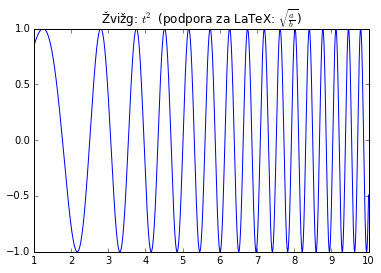

In [120]:
t = np.linspace(1, 130, 44000)
zvizg=np.sin(t**2)
#plt.figure(figsize=(20,6))
plt.plot(t, zvizg)
plt.xlim(1, 10)
plt.title('Žvižg: $t^2$ (podpora za LaTeX: $\\sqrt{\\frac{a}{b}}$)');

Zakaj žvižg?

In [97]:
from IPython.display import Audio, display
display(Audio(data=zvizg, rate=44000))

Aktivirajmo sedaj interaktivni način (glejte tudi ``%matplotlib?``):

In [98]:
%matplotlib

Using matplotlib backend: Qt4Agg


In [99]:
plt.plot(t, zvizg);

Sedaj lahko kaj dodajamo na sliko:

In [100]:
plt.title('Žvižg: $t^2$ (podpora za LaTeX: $\\sqrt{\\frac{a}{b}}$)');
plt.xlabel('Čas [$t$]')

### Osnovna uporaba

Poglejmo si tukaj preprost primer prikaza več funkcij:

In [101]:
%matplotlib inline

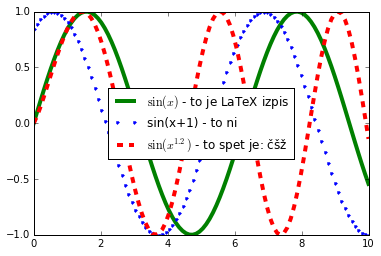

In [108]:
x = np.linspace(0, 10, 100)

y1 = np.sin(x)
y2 = np.sin(x+1)
y3 = np.sin(x**1.2)

plt.plot(x, y1, 'g-', label='$\sin(x)$ - to je LaTeX izpis', linewidth = 4); # glejte help za parametre (barve, tip črte,...)
plt.plot(x, y2, 'b.', label='sin(x+1) - to ni', linewidth = 4);
plt.plot(x, y3, 'r--', label='$\sin(x^{1.2})$ - to spet je: čšž', linewidth = 4);
plt.legend(loc=10); # glejte help za postavitev legende
plt.savefig('data/prvi plot.pdf')

### Več slik

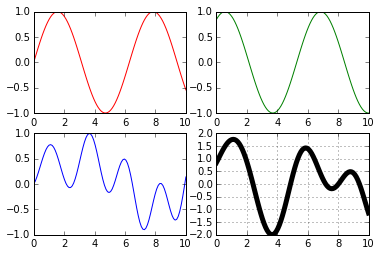

In [109]:
plt.subplot(2, 2, 1)
plt.plot(x, y1, 'r')
plt.subplot(2, 2, 2)
plt.plot(x, y2, 'g')
plt.subplot(2, 2, 3)
plt.plot(x, y2*y3, 'b')
plt.subplot(2, 2, 4)
plt.plot(x, y2+y3, 'k', linewidth=5);
plt.grid()

### Histogram

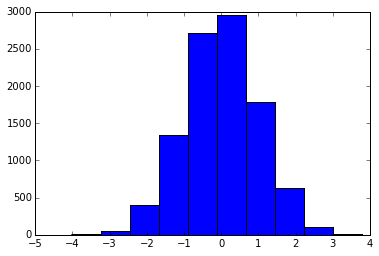

In [110]:
x = np.random.normal(size=10000)
plt.hist(x);

### Uporaba primerov iz ``matplotlib.org``

Poglejmo sedaj en zgled iz [uradne strani](http://matplotlib.org/gallery.html).

In [ ]:
%load http://matplotlib.org/mpl_examples/lines_bars_and_markers/fill_demo.py

Poglejmo še primer z drsniki in gubi (moramo preklopiti na interaktivni način):

In [ ]:
%load http://matplotlib.org/examples/widgets/slider_demo.py

Zgornji primer s pridom uporablja dejstvo, da je v Pythonu vse objekt. Spodaj v razdelku *Ekstra* lahko najdete bolj podroben primer.

En primer malo za hec. Z ``matplotlib`` lahko relativno enostavno rišemo v **xkcd** stilu (http://xkcd.com/): 

In [ ]:
plt.xkcd()  # Yes...
plt.plot(np.sin(np.linspace(0, 10)), 'r', label='Rdeči val:)')
plt.plot(np.sin(np.linspace(0, 10)-1), 'b', label='Modri val:)')
plt.title('Hopa, a bo modri ujel rdečega?')
plt.legend();

In [ ]:
# %load http://matplotlib.org/mpl_examples/showcase/xkcd.py

# Do naslednjih vaj preštudirajte sledeče:

1. Naredite slovar lokalno nameščenih modulov (uporabite izpeljevanje slovarjev, key naj bo ime modula, vrednost naj bo verzija)
2. S pomočjo slovarja iz prejšnje točke čimbolj elegantno preveriti ali so nameščeni sledeči moduli: ['numpy', 'scipy', 'matplotlib', 'pandas', 'pyjamas', 'openpyxl'].
3. Namestite poljubni modul iz https://pypi.python.org/pypi in ga preizkusite.
4. Pretvorite *navaden* Python seznam v ``numpy`` seznam. Preverite tip enega in drugega.
5. Raziščite funkcije ``np.ones``, ``np.zeros_like``, ``np.arange``, ``np.linspace`` (ali zadnja funkcija lahko vrne korak?)
6. Prikažite uporabo rezanja.
7. Prikažite razliko med vrstičnim in stolpčnim vektorjem. Prikažite tipične matematične operacije med vektrji in matrikami.
8. Ustvarite matriko ničel dimenzije 3 x 2 in drugi stolpec zapolnite z vektorjem enic.
9. Ustvarite enotsko matriko dimenzije 5 podatkovnega tipa ``complex``.
10. Ustvarite enotsko matriko dimenzije ``N`` in izračunajte vsoto poljubnga stolpca. Poskusite najti najhitrejši in najelegantnejši (vektoriziran) način in ga primerjajte s pristopom v zanki. Namig: np.sum().
11. V matriki iz prejšnje točke zamenjajte poljubna stolpca, nato še poljubni vrstici. Preverite hitrost vaše implementacije.
12. S pomočjo funkcije ``np.random.rand`` ustvarite dvorazsežno matriko poljubne dimenzije in najdite največjo in najmanjo vrednost. Preverite opcijo ``axis`` v funkciji ``np.max`` ali ``np.min``
13. V matriki iz prejšnje točke najdite indeks kjer se nahaja največja vrednost.
14. Na primeru preprostega diagrama prikažite razliko med *inline* in *interaktivno* uporabo knjižnice ``matplotlib``
15. Na primeru preprostega diagrama prikažite uporabo vsaj 5 različnih tipov črte in 5 različnih barv.
16. Raziščite primere http://matplotlib.org/gallery.html. Za primer si podrobneje poglejte enega od zgledov na temo zaznamb *annotation*. Izbrani primer naložite v vaš *notebook*.
17. Na primeru preprostega diagrama prikažite uporabo zaznamb.
18. Ekstra: Naredite preprosto animacijo.
19. Ekstra: Izrišite več krogov naključne legež in velikosti ter poljubne barve. Ob kliku se krogom naj spremeni barva.

Delno rešene vaje se nahajajo [tukaj](./vaje/Vaja 3 - polovica.ipynb).

# Ekstra

## Interaktivno spreminjanje in animacija

In [ ]:
%matplotlib

Ustvarimo objekt slike in osi

In [ ]:
fig, ax = plt.subplots()

Sedaj se odprlo interktivno okno. Narišimo nakej podatkov:

In [ ]:
ax.plot(np.random.rand(100))

Vidimo, da nam funkcija vrne terko z objektom ``Line2D``. Na sliki se nič ne zgodi, ker moramo objektu ``fig`` sporočiti, da naj posodobi sliko:

In [ ]:
fig.canvas.draw()

Narišimo še enkrat podatke, vendar tokrat ujamimo objekt ``Line2D`` v spremenljivko:

In [ ]:
line, = ax.plot(np.random.rand(100))
fig.canvas.draw()

Sedaj raziščimo kaj lahko objektu spremenimo:

In [ ]:
line.set_linewidth(4)
line.set_color('r')
line.set_dashes((2,4))
line.set_marker('o')
fig.canvas.draw()

Sedaj lahko nadaljujemo sliko animiramo

In [ ]:
N = 100
a = 0.5 + 0.5*np.sin(np.linspace(0, 2*np.pi, N, endpoint=False))
for i in range(N):
    line.set_ydata(a)
    fig.canvas.draw()
    a = np.roll(a, 1)

To je bil prvi korak v smeri animacije. Če želimo animacio tudi shraniti in jo narediti bolj urejeno, postopamo kakor je prikazano [tukaj](http://nbviewer.ipython.org/github/jakevdp/matplotlib_pydata2013/blob/master/notebooks/05_Animations.ipynb).

## Primer spreminjanja barve s klikom.

Poglejmo si sedaj še preprosti primer *call-back* funkcije:

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
for i in range(5):
    rect = plt.Rectangle((i, i), 1, 1, fc=np.random.random(3), picker=True)
    ax.add_patch(rect)

def ob_kliku(dogodek):
    artist = dogodek.artist
    artist.set_fc(np.random.random(3))
    fig.canvas.draw()
    
fig.canvas.mpl_connect('pick_event', ob_kliku)

Tukaj se sedaj lahko ustavimo neskončno dolgo časa in rišemo različne tipe prikaza. Če boste potrebovali določeni tip prikaza priporočam, da začnete z zgledom. 

Za tiste, ki vas zanima napredna uporaba (call-back funkcije, animacije,...), toplo priporočam ta [tutorial](http://nbviewer.ipython.org/github/jakevdp/matplotlib_pydata2013/tree/master/notebooks/).

Nekatere detajle ``matplotlib`` bomo spoznali v nadaljih predavanjih.

## Za najbolj zagrete

1. Naučite se kaj novega na [chrisalbon.com](http://chrisalbon.com/)